<h2>Quiz 1 : Pivoting and Melting</h2>

Jelaskan itu pivoting dan melting data

jawaban :
* pivot merupakan proses mengubah bentuk data dengan memutar data yang terletak di baris menjadi di column

* melting merupkan 'unpivoting' mengubah data yang tadinya lebar menjadi panjang

<h2>Quiz 2 : Data structure Comprehension</h2>

Data yang rapi adalah :
1. Setiap row menunjukan suatu unit observasi
2. Setiap column merupakan suatu unit variable

Bagaimana pun, dalam menentukan unit observasi itu tergantung dari kasus yang di hadapi. sebagai seorang data scientist pasti akan menemukan berbagai bentuk struktur data. adalah sangat penting bagi seorang data scientist untuk dapat memahami dan menjelaskan setiap struktur data. Kemampuan memahami hubungan antara index baris, column dan isi data adalah kunci untuk memahami informasi apa yang data sedang beritahukan kepada kita.

Di bawah ini terdapat 2 data yang berisi sama, tetapi memiliki struktur yang berbeda. Jelaskan perbedaan dari 2 struktur data tersebut

![title](image/day3-penjelasan-soal-quiz-2-(1).png)
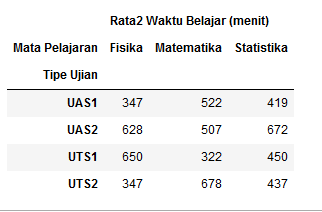

![title](image/day3-penjelasan-soal-quiz-2.png)
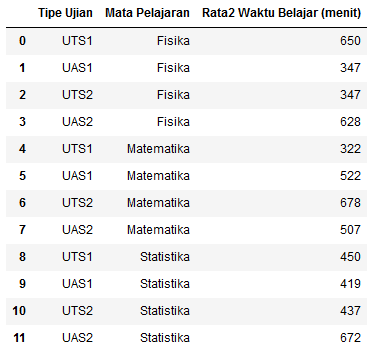

<h2>Quiz 3 : Reshaping Data 1</h2>

In [2]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)] 
}
df = pd.DataFrame(data)
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
0,UTS1,Fisika,468,54
1,UAS1,Fisika,406,70
2,UTS2,Fisika,629,57
3,UAS2,Fisika,738,98
4,UTS1,Matematika,285,57
5,UAS1,Matematika,635,60
6,UTS2,Matematika,676,74
7,UAS2,Matematika,537,88
8,UTS1,Statistika,563,70
9,UAS1,Statistika,675,88


Perhatikan data di atas, kemudian ubahlah bentuknya agar sesuai yang di harapkan.

In [4]:
# code here
df.pivot_table(index='Tipe Ujian', columns='Mata Pelajaran',values=['Rata2 Nilai Ujian','Rata2 Waktu Belajar (menit)'])

Rata2 Nilai Ujian                        \
Mata Pelajaran            Fisika Matematika Statistika   
Tipe Ujian                                               
UAS1                          70         60         88   
UAS2                          98         88         91   
UTS1                          54         57         70   
UTS2                          57         74         95   

               Rata2 Waktu Belajar (menit)                        
Mata Pelajaran                      Fisika Matematika Statistika  
Tipe Ujian                                                        
UAS1                                   406        635        675  
UAS2                                   738        537        293  
UTS1                                   468        285        563  
UTS2                                   629        676        632

Expected Result :

![title](image/day3-expected-output-no.3.png)
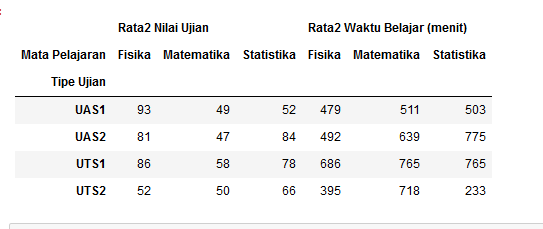

<h2>Quiz 4 : Reshaping Data 2</h2>

In [19]:
import pandas as pd

data = {
    'Hari' : ['Sabtu', 'Minggu'],
    'Kebun Binatang' : [271, 399],
    'Dufan' : [501, 700],
    'Disney' : [1000, 1001],
    'Bali' : [900, 803]
}
df = pd.DataFrame(data).set_index('Hari')
df = df.reset_index()
df

,Hari,Kebun Binatang,Dufan,Disney,Bali
0,Sabtu,271,501,1000,900
1,Minggu,399,700,1001,803


diatas adalah data tentang jumlah pengunjung di berbagai tempat hiburan, ubahlah struktur data tersebut sehingga sesuai dengan hasil yang diharapkan.

In [30]:
pd.melt(df,id_vars=['Hari'],value_vars=['Kebun Binatang','Dufan','Disney','Bali'], value_name='Pengujung',var_name='Tempat Hiburan')

,Hari,Tempat Hiburan,Pengujung
0,Sabtu,Kebun Binatang,271
1,Minggu,Kebun Binatang,399
2,Sabtu,Dufan,501
3,Minggu,Dufan,700
4,Sabtu,Disney,1000
5,Minggu,Disney,1001
6,Sabtu,Bali,900
7,Minggu,Bali,803


Expected Result :

![title](image/day3-expected-output-no.4.png)
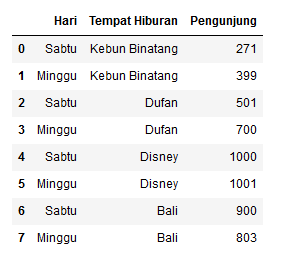

<h2>Quiz 5 : Pivoting and Aggregating</h2>

In [93]:
import pandas as pd

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1']*3,
    'Mata Pelajaran' :['Statistika', 'Fisika', 'Fisika', 'Statistika', 'Fisika', 'Statistika'],
    'Jumlah Peserta' : [14, 17, 12, 16, 14, 13]
}
df = pd.DataFrame(data).set_index('Tipe Ujian')
df

,Mata Pelajaran,Jumlah Peserta
Tipe Ujian,,
UTS1,Statistika,14
UAS1,Fisika,17
UTS1,Fisika,12
UAS1,Statistika,16
UTS1,Fisika,14
UAS1,Statistika,13


Perhatikan bahwa data jumlah peserta ujian untuk suatu tipe ujian dan mata pelajaran tertentu ada yang duplikat, ubahlah struktur data tersebut dan lakukan aggregasi berjenis jumlah sehingga sesuai dengan hasil yang di harapkan

Expected Result :

![title](image/day3-expected-output-no.5.png)
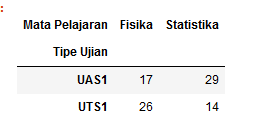

In [94]:
df = df.reset_index()

In [96]:
df.head()
df = df.pivot_table(index='Tipe Ujian',columns='Mata Pelajaran',values='Jumlah Peserta',aggfunc='sum')

In [97]:
df

Mata Pelajaran,Fisika,Statistika
Tipe Ujian,,
UAS1,17,29
UTS1,26,14
